In [1]:
import scipy.stats as ss
import pylab as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
from pyabc.plots import plot_marginals, plot_particles
from pyabc.examples import clinic

%matplotlib notebook

/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# get simulator and look at some data
simulator = clinic.simulator

simulator.__code__.co_argcount, simulator.__code__.co_varnames

(2,
 ('self',
  'lmbd',
  'nr_doctors',
  'patients_in_treatment',
  'result',
  'treatment_time',
  'create_patient_list',
  'list_of_patients',
  'N',
  'i',
  'arrival',
  'doctor',
  'treatment_end',
  'waiting_time'))

<IPython.core.display.Javascript object>


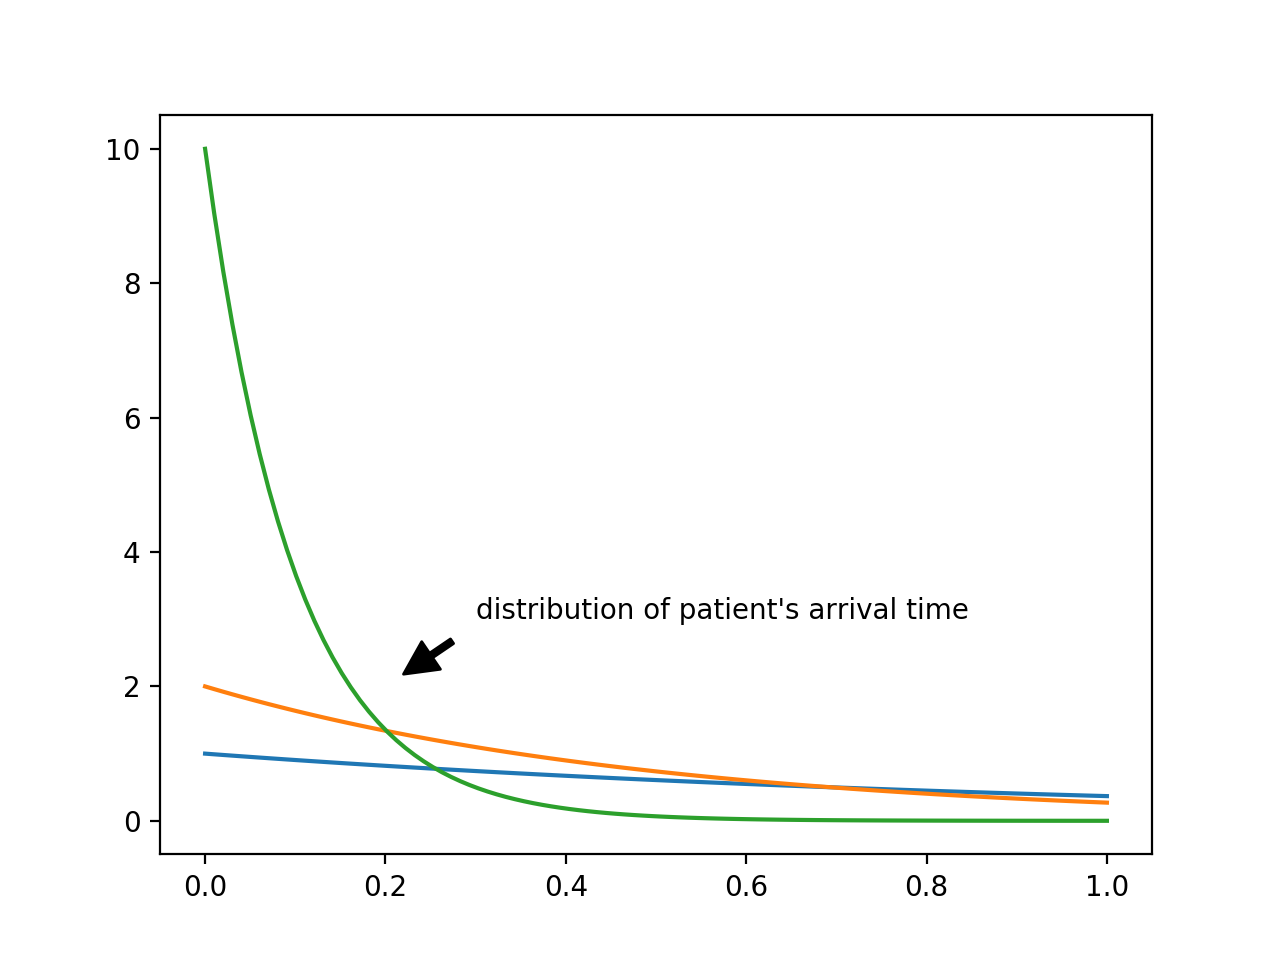

In [3]:
# draw two exponential distributions with large and small lambda
e1 = ss.expon(scale=1)
e2 = ss.expon(scale=1/1/2)
e3 = ss.expon(scale=1/1/10)

plt.figure()
for e in [e1,e2,e3]:
    x = np.linspace(0,1,100)
    plt.plot(x, e.pdf(x))
    #plt.yscale("log")
    
plt.annotate("distribution of patient's arrival time", xy=(0.2, 2), xytext=(0.3, 3), arrowprops=dict(facecolor='black', width=2, shrink=0.2))

In [4]:
# create observation
lambda0 = 1/8

y0 = simulator(lambda0)
y0

[[45], array([ 0.        ,  0.        ,  0.        ,  0.        ,  5.39943414,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  2.08613991,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.84913755,  0.38970548,  5.17327576]), [974.52407172930896]]

In [5]:
# get summaries
summaries = clinic.summaries
clinic.summary_names

['closing_time', 'nr_patients', 'nr_waiting_patients']

In [6]:
for s in summaries:
    print(s(y0))
    
# any other summary stats? what about total waiting time?

[ 974.52407173]
[45]
[5]


<IPython.core.display.Javascript object>


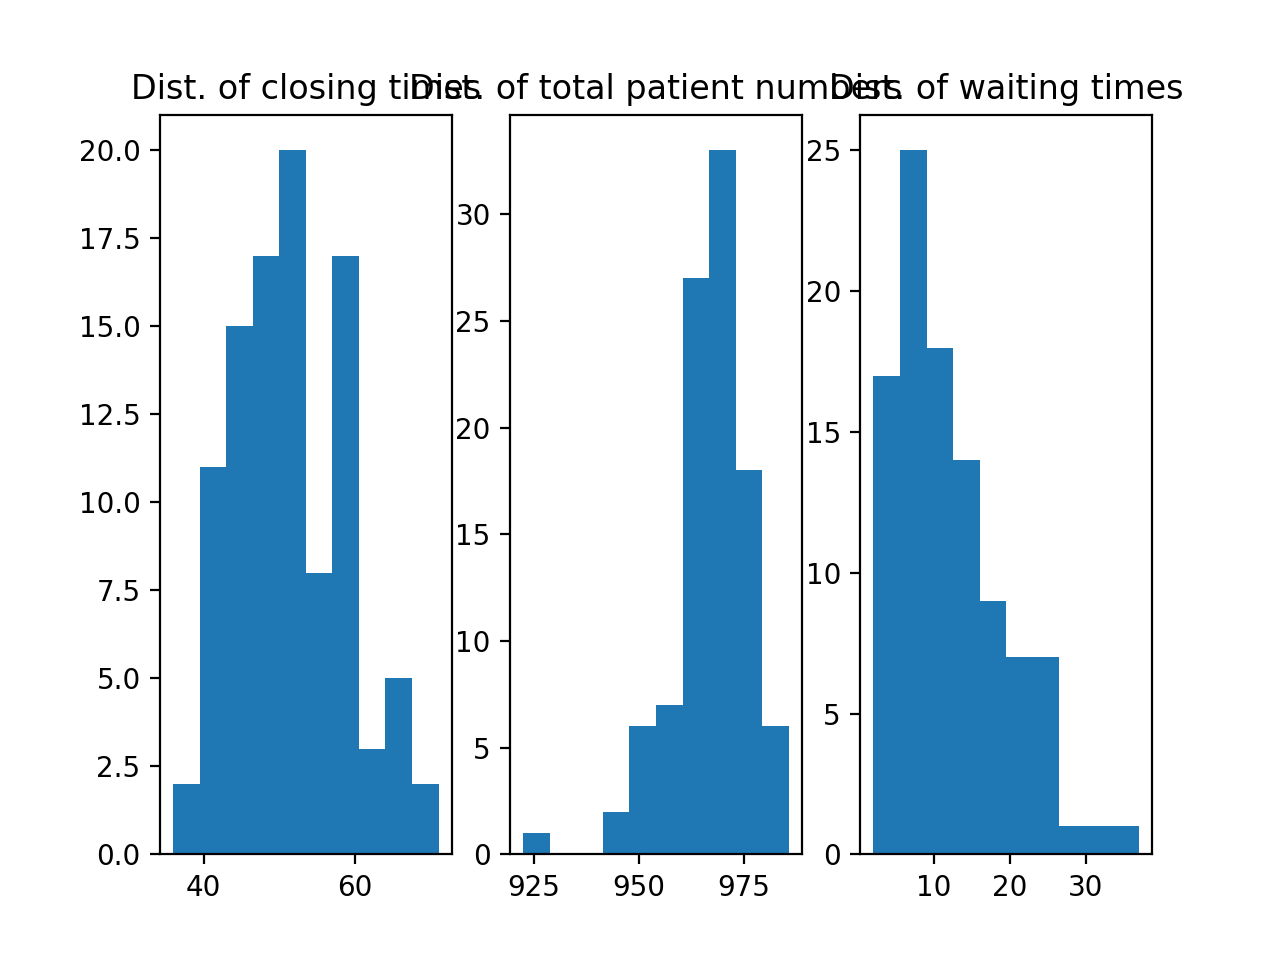

In [7]:
# how different can the simulation be?
nr_patients = np.zeros(100)
closing_times = np.zeros(100)
nr_waiting_patients = np.zeros(100)

for i in range(100):
    y0 = simulator(lambda0)
    closing_times[i], nr_patients[i], nr_waiting_patients[i] = [s(y0) for s in summaries]
    
plt.figure()
plt.subplot(1,3,1)
plt.hist(nr_patients)
plt.title("Dist. of closing times")
plt.subplot(1,3,2)
plt.hist(closing_times)
plt.title("Dist. of total patient numbers")
plt.subplot(1,3,3)
plt.hist(nr_waiting_patients)
plt.title("Dist. of waiting times")


<IPython.core.display.Javascript object>


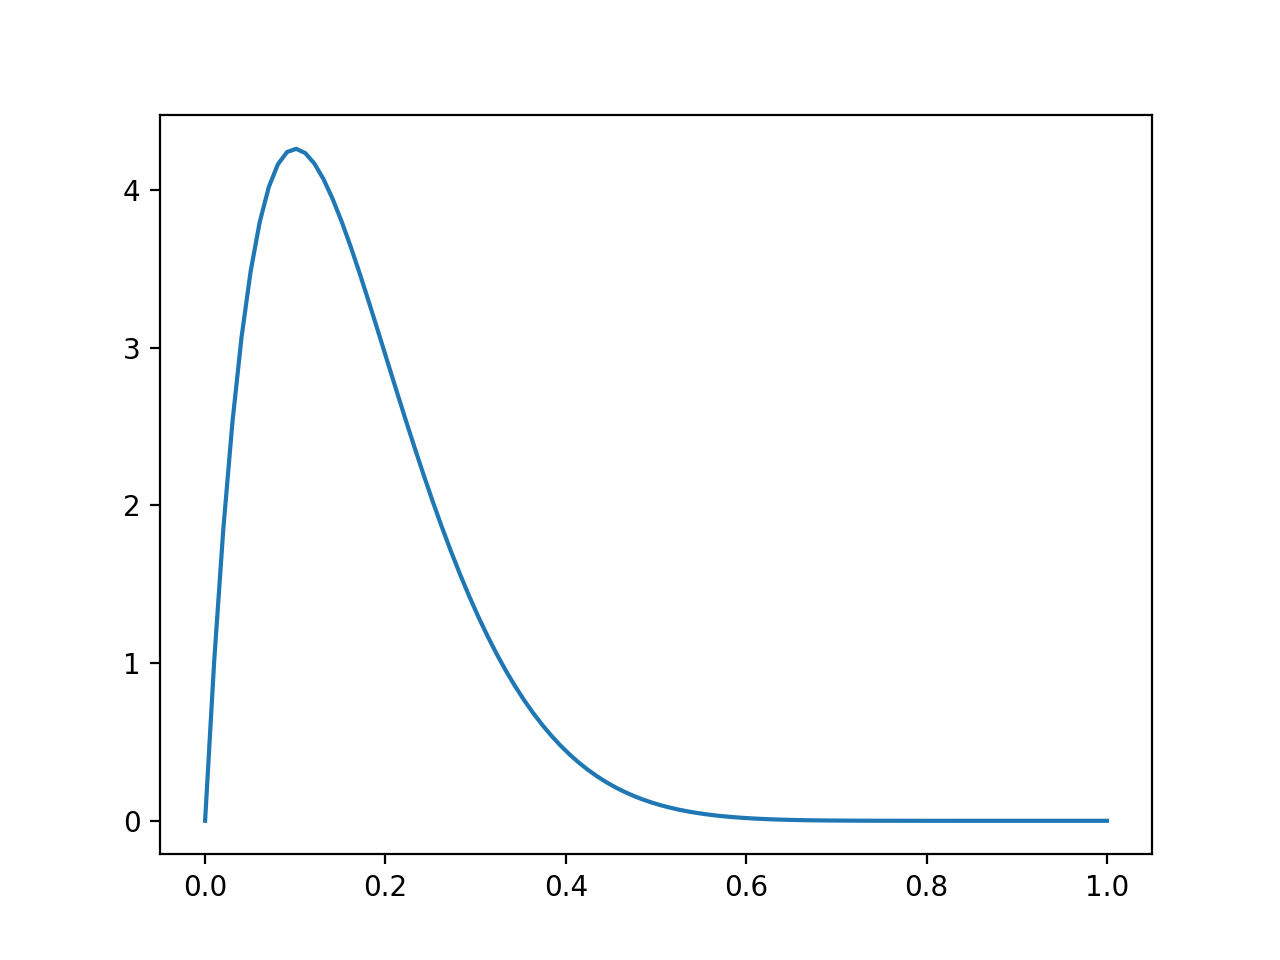

In [8]:
# prior
prior = pyabc.Prior("beta", 2, 10, name="lambda")

plt.figure()
x = np.linspace(0, 1, 100)
y = prior.pdf(x)
plt.plot(x,y)

In [9]:
# setup sampler classes
rej = pyabc.RejectionSampler(simulator=simulator, summaries=summaries, priors=prior, observation=y0)
mcmc = pyabc.MCMCSampler(simulator=simulator, summaries=summaries, priors=prior, observation=y0)
smc = pyabc.SMCSampler(simulator=simulator, summaries=summaries, priors=prior, observation=y0)
abcde = pyabc.ABCDESampler(simulator=simulator, summaries=summaries, priors=prior, observation=y0)

In [10]:
rej.sample(nr_samples=100, threshold=3)

Rejection sampler started with threshold: 3 and number of samples: 100
Samples:    100 - Threshold: 3.0000 - Iterations:      50000 - Acceptance rate: 0.002000 - Time:    21.25 s


In [11]:
rej.simtime

18.89098300000021

In [12]:
mcmc.sample(nr_samples=100, threshold=3, step_size=[0.1])

MCMC sampler started with threshold: 3 and number of samples: 100
Samples:    100 - Threshold: 3.0000 - Iterations:      26845 - Acceptance rate: 0.003725 - Time:    23.68 s


In [15]:
mcmc.simtime

14.365332000000354

In [13]:
smc.sample(nr_samples=100, thresholds=np.linspace(5,3,3))

SMC sampler started with thresholds: [ 5.  4.  3.] and number of samples: 100
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]
Iteration 2 completed
Samples:    100 - Thresholds: 3.00 - Iterations:      31027 - Acceptance rate: 0.003223 - Time:    21.37 s


In [14]:
abcde.sample(nr_samples=100, nr_iter=50, nr_groups=5, burn_in=50, alpha=0, beta=0, kappa=0.9)

ABC-Differential-Evolution sampler started with number of samples: 100
initializing pools
Samples:    100 - Iterations:         50 - Acceptance rate: None - Time:     9.36 s


<IPython.core.display.Javascript object>


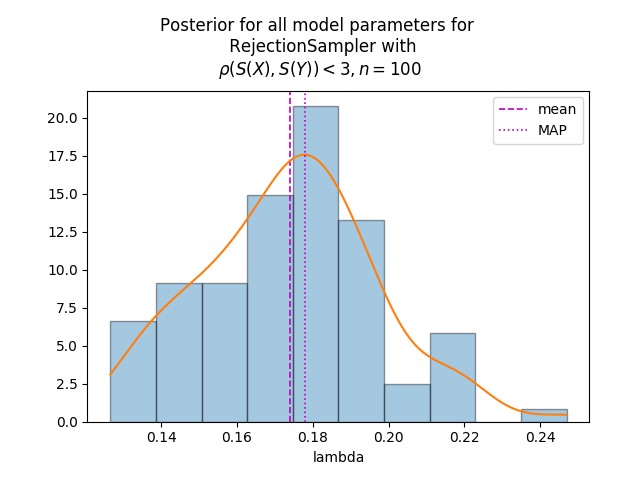

<IPython.core.display.Javascript object>


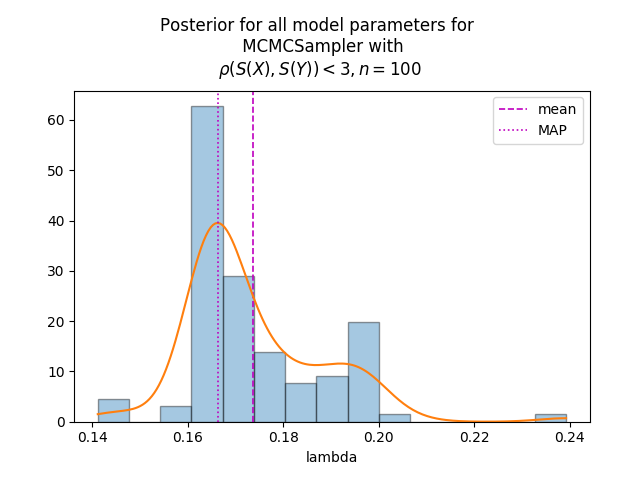

<IPython.core.display.Javascript object>


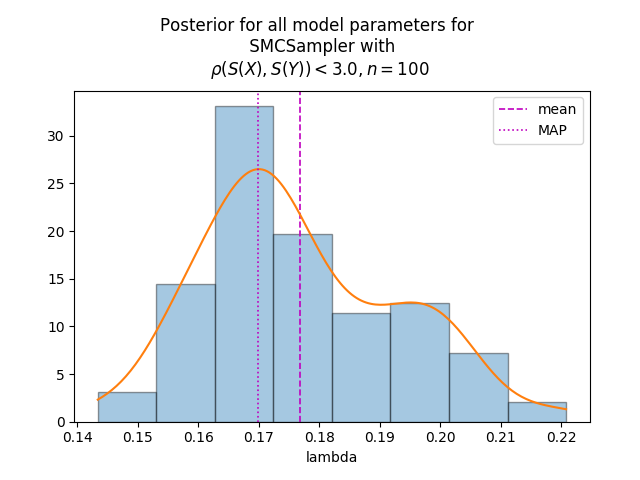

<IPython.core.display.Javascript object>


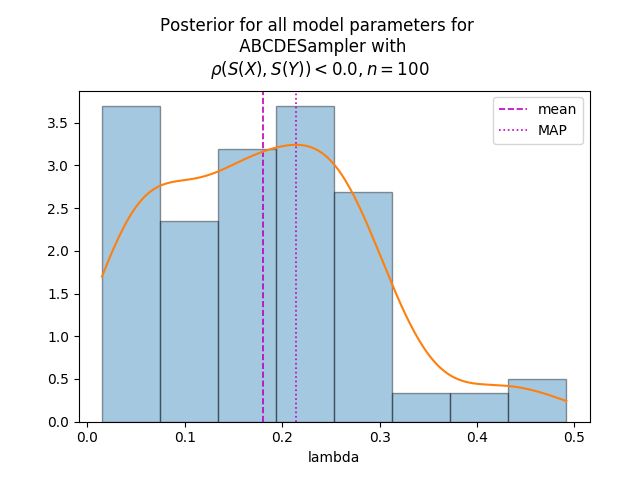

<IPython.core.display.Javascript object>


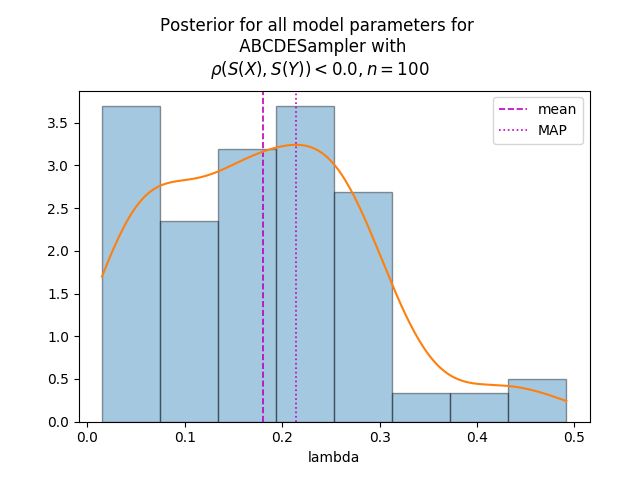

In [49]:
fig = plot_marginals(rej)
fig = plot_marginals(mcmc)
fig = plot_marginals(smc)
fig = plot_marginals(abcde)

<IPython.core.display.Javascript object>


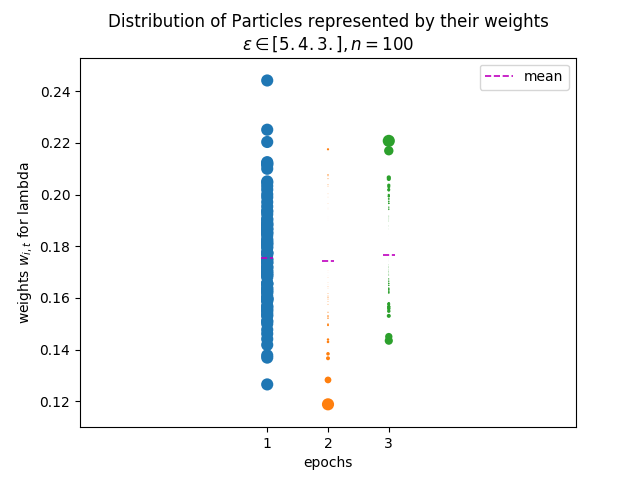

<IPython.core.display.Javascript object>


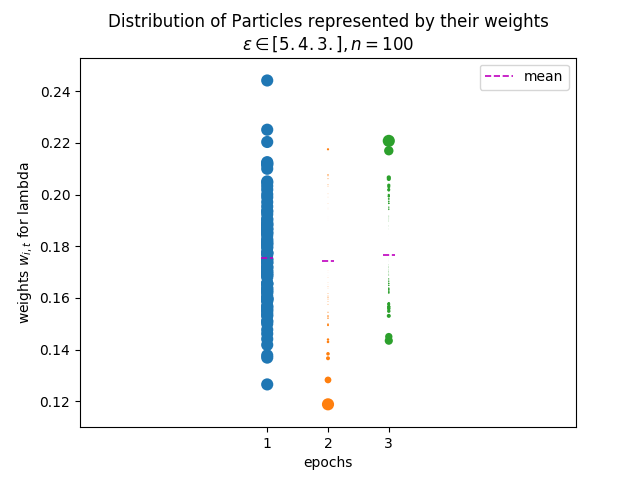

In [50]:
fig = plot_particles(smc)

In [67]:
rej.sample(nr_samples=200, threshold=1.5)

Rejection sampler started with threshold: 1.5 and number of samples: 200
Samples:    200 - Threshold: 1.5000 - Iterations:     566000 - Acceptance rate: 0.000353 - Time:   224.47 s


In [63]:
mcmc.sample(nr_samples=200, threshold=1.5, step_size=[0.1])

MCMC sampler started with threshold: 1.5 and number of samples: 200
Samples:    200 - Threshold: 1.5000 - Iterations:     415984 - Acceptance rate: 0.000481 - Time:   403.76 s


In [70]:
smc.sample(nr_samples=200, thresholds=np.linspace(2.5,1.5,4))

SMC sampler started with thresholds: [ 2.5         2.16666667  1.83333333  1.5       ] and number of samples: 200
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]
Iteration 2 completed
starting iteration[ 3 ]
Iteration 3 completed
Samples:    200 - Thresholds: 1.50 - Iterations:     554760 - Acceptance rate: 0.000361 - Time:   448.06 s


In [65]:
abcde.sample(nr_samples=200, nr_iter=200, nr_groups=5, burn_in=100, alpha=0.1, beta=0.1, kappa=0.9)

ABC-Differential-Evolution sampler started with number of samples: 200
initializing pools
starting iteration [ 100 ]
Samples:    200 - Iterations:        200 - Acceptance rate: None - Time:    74.44 s


<IPython.core.display.Javascript object>


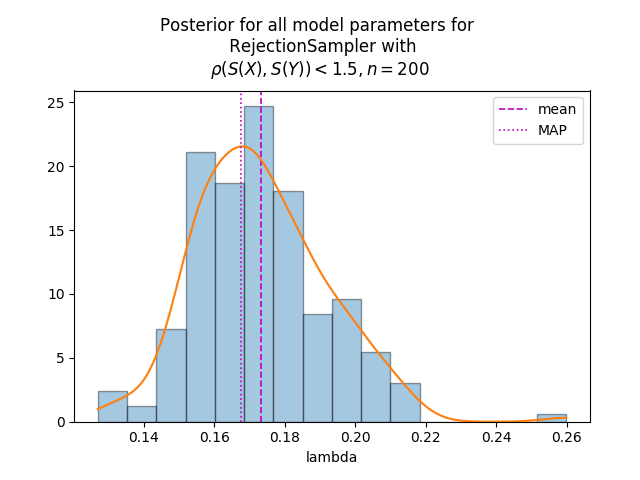

<IPython.core.display.Javascript object>


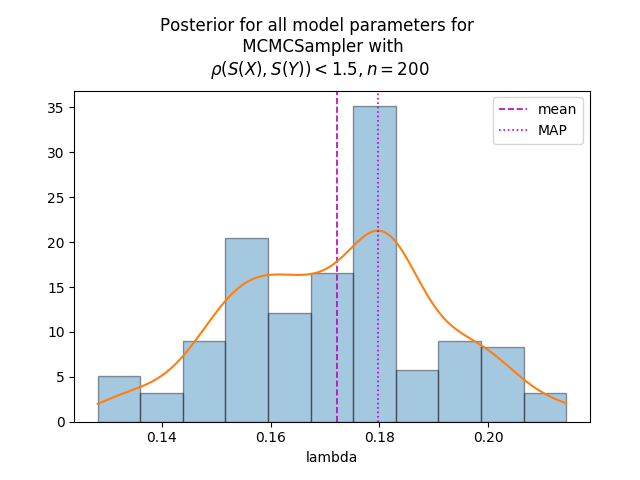

<IPython.core.display.Javascript object>


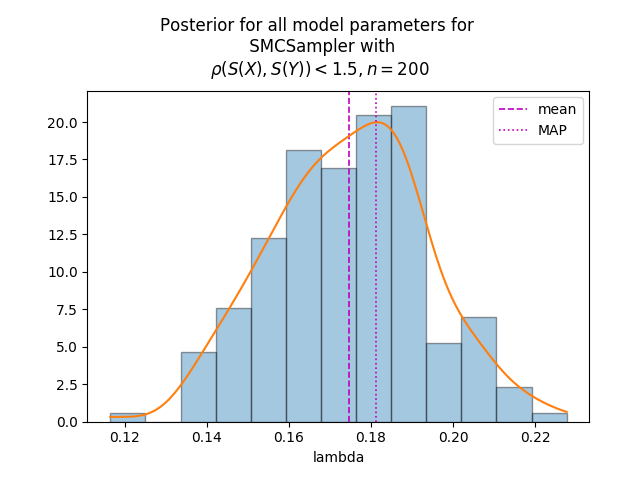

<IPython.core.display.Javascript object>


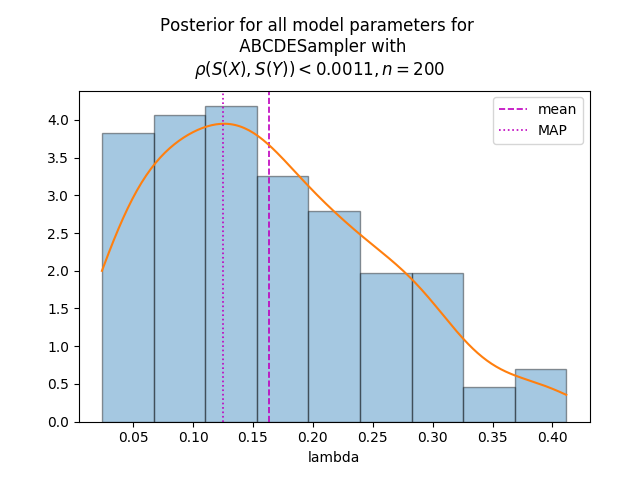

In [68]:
fig = plot_marginals(rej)
fig = plot_marginals(mcmc)
fig = plot_marginals(smc)
fig = plot_marginals(abcde)